<a href="https://colab.research.google.com/github/aimenSaf/Predicting-Student-Score-using-Simple-Linear-Regression/blob/main/Student_Grade_Preiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Scores from Student Sleeping Hours using Simple Linear Regression



Getting the required libraries

In [16]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

Importing dataset from kaggle

In [17]:

# Download latest version
path = kagglehub.dataset_download("snmahsa/student-score-suitable-for-linear-regression")  #path holds the directory, not the actual csv

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'student-score-suitable-for-linear-regression' dataset.
Path to dataset files: /kaggle/input/student-score-suitable-for-linear-regression


Reading data from csv into dataframe

In [18]:
df = pd.read_csv(f"{path}/rounded_hours_student_scores.csv")

df.head()

,Hours,Scores
0,1.1,41
1,1.2,40
2,1.4,38
3,1.5,39
4,1.6,36


In [19]:
df.shape[0]  #returning the number of rows

#mv = df.isnull()
#print(mv)

60

Observing the label and feature

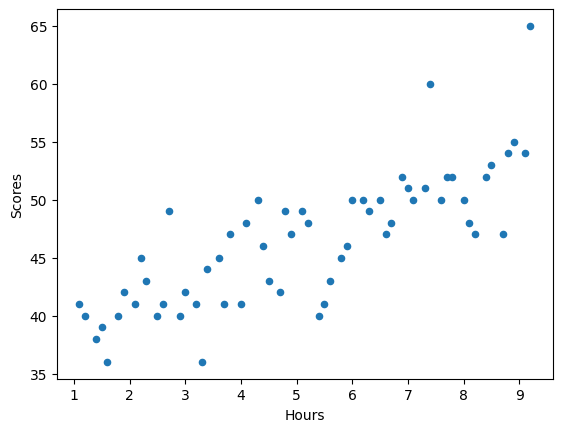

In [20]:
df.plot(kind='scatter', x='Hours', y='Scores')
plt.show()


In [26]:
#preparing x values - the independent varaible is hours
X = df[['Hours']]
#preparing y values - the dependent varaible is scores
Y = df['Scores']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Training the model

In [29]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

Predicting

In [31]:
Y_pred = model.predict(X_test)

In [32]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_pred, Y_test)
mae = mean_absolute_error(Y_test, Y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 2.8186706405470523
Mean Squared Error: 15.667805255500062
R-squared: 0.37841449661733684


# Displaying the Model Predictions and Errors:
Create a DataFrame to display the actual values, predicted values, and the absolute error for each prediction. This provides a clear overview of the model's performance for individual data points.

In [34]:
results_df = pd.DataFrame({
    "Actual": Y_test,
    "Predicted": Y_pred,
    "Absolute Error": abs(Y_test-Y_pred)
})

results_df

,Actual,Predicted,Absolute Error
0,41,38.522608,2.477392
5,40,39.834559,0.165441
36,50,47.706265,2.293735
45,51,50.142745,0.857255
13,40,41.896196,1.896196
54,53,52.391804,0.608196
33,43,46.956579,3.956579
48,52,50.892432,1.107568
12,49,41.521353,7.478647
57,55,53.141490,1.858510


# Plot for Actual VS predicted Values

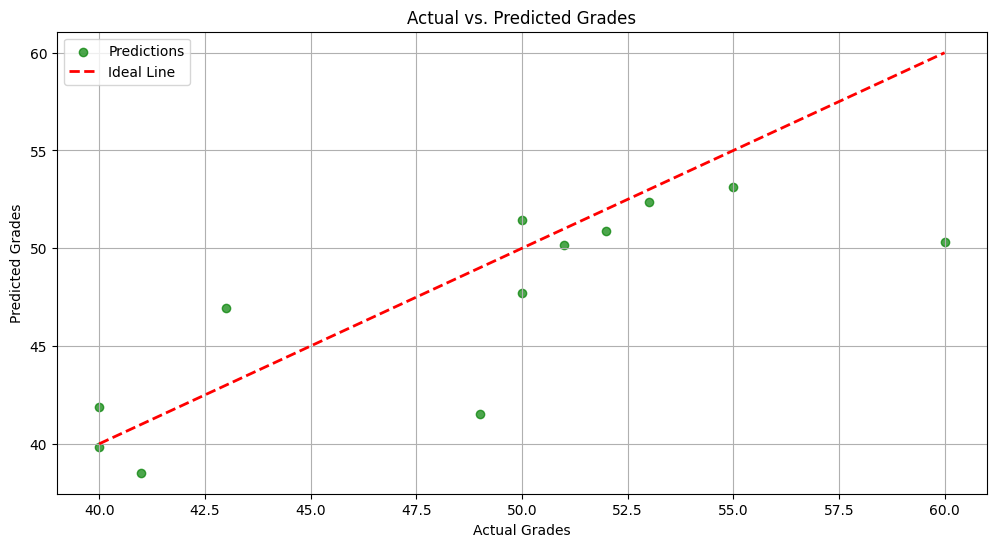

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred, alpha=0.7, color='green', label="Predictions")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', linewidth=2, label="Ideal Line")
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs. Predicted Grades")
plt.legend()
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()
